In [7]:
# !pip3 install lifelines

In [2]:
!pip3 install lifelines

  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=df5c8b54474e3e3beb184f4c324c46b995d1940a2e8393299589797ba66770e1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


# Survival 통계분석 패키지 - lifelines

- Log Rank Test

In [3]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import pandas as pd

<br><br><br>
데이터 임의 생성

In [4]:
data = pd.DataFrame({
    'time' : [7, 5, 3, 50, 38, 17, 7, 2, 4, 6, 8, 10, 14, 18, 22, 28, 40], # 게임에 가입한 기간
    'treatment' : [1,1,1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2], # 신규가입 보너스 지급
    'event' : [True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False] # 결제 유무
})

In [5]:
data

,time,treatment,event
0,7,1,True
1,5,1,False
2,3,1,True
3,50,2,False
4,38,2,False
5,17,2,False
6,7,1,True
7,2,1,True
8,4,1,False
9,6,1,True


<br><br><br>

Survival data 시각화

<AxesSubplot:xlabel='time', ylabel='S(t)'>

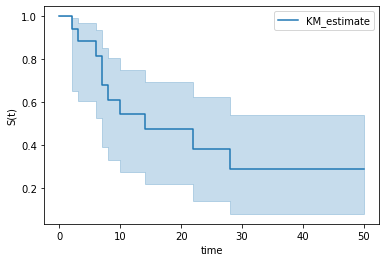

In [6]:
kmf = KaplanMeierFitter()
kmf.fit(data['time'], data['event'])

plot = kmf.plot_survival_function()
plot.set_xlabel('time')
plot.set_ylabel('S(t)')
plot
# True인 시간에 수직하강 한다. time 7에서는 2번 True라 2번 떨어진다.

<br><br><br>
'Censored 표시' 의 의미: 중도절단

<AxesSubplot:xlabel='time', ylabel='S(t)'>

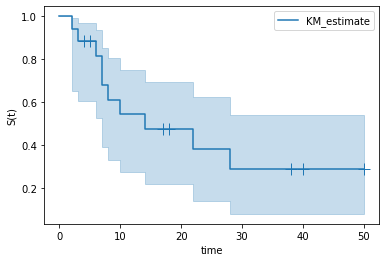

In [7]:
kmf = KaplanMeierFitter()
kmf.fit(data['time'], data['event'])

plot = kmf.plot_survival_function(show_censors=True)
plot.set_xlabel('time')
plot.set_ylabel('S(t)')
plot

<AxesSubplot:xlabel='Time (Months)', ylabel='Survival Rate'>

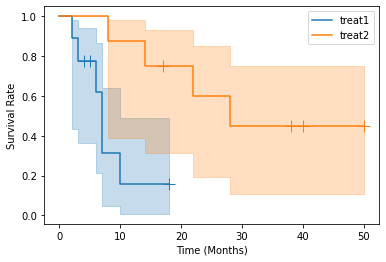

In [20]:
treat1 = data[data['treatment'] == 1]
treat2 = data[data['treatment'] == 2]

kmf = KaplanMeierFitter()
kmf.fit(treat1['time'], treat1['event'], label='treat1')
ax_kmf = kmf.plot(show_censors=True)
kmf.fit(treat2['time'], treat2['event'], label='treat2')
ax_kmf = kmf.plot(ax = ax_kmf, show_censors=True)

ax_kmf.set_xlabel('Time (Months)')
ax_kmf.set_ylabel('Survival Rate')
ax_kmf

In [37]:
help(logrank_test)

Help on function logrank_test in module lifelines.statistics:

logrank_test(durations_A, durations_B, event_observed_A=None, event_observed_B=None, t_0=-1, weights_A=None, weights_B=None, weightings=None, **kwargs) -> lifelines.statistics.StatisticalResult
    Measures and reports on whether two intensity processes are different. That is, given two
    event series, determines whether the data generating processes are statistically different.
    The test-statistic is chi-squared under the null hypothesis. Let :math:`h_i(t)` be the hazard ratio of
    group :math:`i` at time :math:`t`, then:
    
    .. math::
        \begin{align}
         & H_0: h_1(t) = h_2(t) \\
         & H_A: h_1(t) = c h_2(t), \;\; c \ne 1
        \end{align}
    
    This implicitly uses the log-rank weights.
    
    Note
    -----
    - *lifelines* logrank implementation only handles right-censored data.
    
    - The logrank test has maximum power when the assumption of proportional hazards is true. As a co

In [21]:
# 육안으로 위 그래프를 보면 유의미한 차이가 있어 보이는데 진짜 유의미 할지 p값으로 확인
logrank_test(treat1["time"], treat2["time"], treat1["event"], treat2["event"]).p_value
# 0.05이하이므로 유의미하다.

0.007341895570690576

In [22]:
data = pd.DataFrame({
    'time' : [7, 5, 3, 50, 38, 17, 7, 2, 4, 6, 8, 10, 14, 18, 22, 28, 40], # 게임에 가입한 기간
    'treatment' : [1,1,1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2], # 신규가입 보너스 지급
    'Gender' : [1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1],
    'event' : [True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False] # 결제 유무
})

<AxesSubplot:xlabel='Time (Months)', ylabel='Survival Rate'>

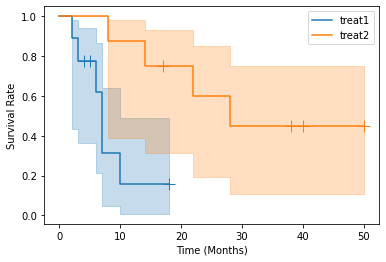

In [23]:
treat1 = data[data['treatment'] == 1]
treat2 = data[data['treatment'] == 2]

kmf = KaplanMeierFitter()
kmf.fit(treat1['time'], treat1['event'], label='treat1')
ax_kmf = kmf.plot(show_censors=True)
kmf.fit(treat2['time'], treat2['event'], label='treat2')
ax_kmf = kmf.plot(ax = ax_kmf, show_censors=True)

ax_kmf.set_xlabel('Time (Months)')
ax_kmf.set_ylabel('Survival Rate')
ax_kmf

<AxesSubplot:xlabel='Time (Months)', ylabel='Survival Rate'>

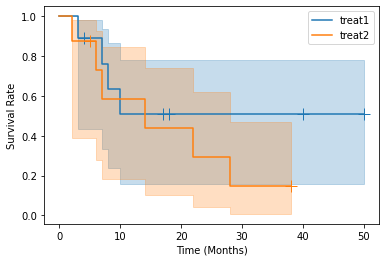

In [24]:
treat1 = data[data['Gender'] == 1]
treat2 = data[data['Gender'] == 2]

kmf = KaplanMeierFitter()
kmf.fit(treat1['time'], treat1['event'], label='treat1')
ax_kmf = kmf.plot(show_censors=True)
kmf.fit(treat2['time'], treat2['event'], label='treat2')
ax_kmf = kmf.plot(ax = ax_kmf, show_censors=True)

ax_kmf.set_xlabel('Time (Months)')
ax_kmf.set_ylabel('Survival Rate')
ax_kmf

In [25]:
treat1 = data[data['treatment'] == 1]
treat2 = data[data['treatment'] == 2]

logrank_test(treat1["time"], treat2["time"], treat1["event"], treat2["event"]).p_value

0.007341895570690576

In [26]:
treat1 = data[data['Gender'] == 1]
treat2 = data[data['Gender'] == 2]

logrank_test(treat1["time"], treat2["time"], treat1["event"], treat2["event"]).p_value

0.38385409266469783

<br><br><br>

# Cox-regression

In [28]:
from lifelines import CoxPHFitter

In [29]:
data.head()

,time,treatment,Gender,event
0,7,1,1,True
1,5,1,2,False
2,3,1,1,True
3,50,2,1,False
4,38,2,2,False


<br><br>
Cox 객체 생성 및 학습

In [30]:
cph = CoxPHFitter()

In [51]:
cph.fit(data, duration_col='time', event_col='event', formula="treatment + Gender")

<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>

In [52]:
cph.print_summary()

C:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 10
   partial log-likelihood = -17.65
         time fit was run = 2022-04-26 22:26:01 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Gender      1.31       3.69       0.77            -0.21             2.82                 0.81                16.73
treatment  -2.64       0.07       0.98            -4.57            -0.72                 0.01                 0.49

            cmp to     z    p   -log2(p)
covariate                               
Gender        0.00  1.69 0.09       3.47
treatment     0.00 -2.69 0.01       7.12
---
Concordance = 0.79
Partial AIC = 39.30
log-likelihood ratio test = 9.95 on 2 df
-log2(p) of ll-ratio test = 7.18

In [53]:
cph.fit(data, duration_col='time', event_col='event', formula="treatment")
cph.print_summary() # exp(coef) : 0.13 -> 7배 증가시킨다?

C:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 10
   partial log-likelihood = -19.22
         time fit was run = 2022-04-26 22:26:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
treatment  -2.03       0.13       0.85            -3.69            -0.37                 0.02                 0.69

            cmp to     z    p   -log2(p)
covariate                               
treatment     0.00 -2.39 0.02       5.90
---
Concordance = 0.73
Partial AIC = 40.45
log-likelihood ratio test = 6.81 on 1 df
-log2(p) of ll-ratio test = 6.79

In [54]:
cph.fit(data, duration_col='time', event_col='event', formula="Gender")
cph.print_summary()

C:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 17 total observations, 7 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 10
   partial log-likelihood = -22.25
         time fit was run = 2022-04-26 22:26:50 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Gender      0.56       1.74       0.65            -0.72             1.83                 0.49                 6.23

            cmp to    z    p   -log2(p)
covariate                              
Gender        0.00 0.86 0.39       1.35
---
Concordance = 0.56
Partial AIC = 46.50
log-likelihood ratio test = 0.75 on 1 df
-log2(p) of ll-ratio test = 1.37